In [73]:
import pandas as pd
import numpy as np
import requests, io # for HTTP requests and I/O commands
import matplotlib.pyplot as plt # for data visualization %matplotlib inline

# scikit-learn modules
from sklearn.model_selection import train_test_split # for splitting the data
from sklearn.metrics import mean_squared_error # for calculating the cost function
from sklearn.ensemble import RandomForestRegressor # for building the model
from sklearn.linear_model import LinearRegression


In [74]:
# Read csv file into DataFrame
from operator import index


df = pd.read_csv("Resources/Google-Playstore.csv")
df.head()

,App Name,App Id,Category,Rating,Rating Count,Installs,Minimum Installs,Maximum Installs,Free,Price,...,Developer Website,Developer Email,Released,Last Updated,Content Rating,Privacy Policy,Ad Supported,In App Purchases,Editors Choice,Scraped Time
0,Gakondo,com.ishakwe.gakondo,Adventure,0.0,0.0,10+,10.0,15,True,0.0,...,https://beniyizibyose.tk/#/,jean21101999@gmail.com,"Feb 26, 2020","Feb 26, 2020",Everyone,https://beniyizibyose.tk/projects/,False,False,False,2021-06-15 20:19:35
1,Ampere Battery Info,com.webserveis.batteryinfo,Tools,4.4,64.0,"5,000+",5000.0,7662,True,0.0,...,https://webserveis.netlify.app/,webserveis@gmail.com,"May 21, 2020","May 06, 2021",Everyone,https://dev4phones.wordpress.com/licencia-de-uso/,True,False,False,2021-06-15 20:19:35
2,Vibook,com.doantiepvien.crm,Productivity,0.0,0.0,50+,50.0,58,True,0.0,...,NaN,vnacrewit@gmail.com,"Aug 9, 2019","Aug 19, 2019",Everyone,https://www.vietnamairlines.com/vn/en/terms-an...,False,False,False,2021-06-15 20:19:35
3,Smart City Trichy Public Service Vehicles 17UC...,cst.stJoseph.ug17ucs548,Communication,5.0,5.0,10+,10.0,19,True,0.0,...,http://www.climatesmarttech.com/,climatesmarttech2@gmail.com,"Sep 10, 2018","Oct 13, 2018",Everyone,NaN,True,False,False,2021-06-15 20:19:35
4,GROW.me,com.horodyski.grower,Tools,0.0,0.0,100+,100.0,478,True,0.0,...,http://www.horodyski.com.pl,rmilekhorodyski@gmail.com,"Feb 21, 2020","Nov 12, 2018",Everyone,http://www.horodyski.com.pl,False,False,False,2021-06-15 20:19:35


In [75]:
# Drop unnessasery columns
ml_df = df.drop(columns=["App Name", "App Id", "Currency", "Minimum Android", "Developer Id", "Developer Website", "Developer Email", 
"Released", "Last Updated", "Privacy Policy", "Scraped Time", "Minimum Installs", "Category", "Installs"])
ml_df.head()

,Rating,Rating Count,Maximum Installs,Free,Price,Size,Content Rating,Ad Supported,In App Purchases,Editors Choice
0,0.0,0.0,15,True,0.0,10M,Everyone,False,False,False
1,4.4,64.0,7662,True,0.0,2.9M,Everyone,True,False,False
2,0.0,0.0,58,True,0.0,3.7M,Everyone,False,False,False
3,5.0,5.0,19,True,0.0,1.8M,Everyone,True,False,False
4,0.0,0.0,478,True,0.0,6.2M,Everyone,False,False,False


In [76]:
# Check for NaNs
ml_df.isnull().sum()

Rating              22883
Rating Count        22883
Maximum Installs        0
Free                    0
Price                   0
Size                  196
Content Rating          0
Ad Supported            0
In App Purchases        0
Editors Choice          0
dtype: int64

In [77]:
# Drop NaNs
#ml_df = ml_df[ml_df["Installs"].notna()]
ml_df = ml_df[ml_df["Size"].notna()]
ml_df = ml_df[ml_df["Rating"].notna()]
ml_df = ml_df[ml_df["Rating Count"].notna()]


In [78]:
# Delete duplicates
ml_df = ml_df.drop_duplicates()
# Check if all duplicates dropped
print(F"Duplicates: {ml_df.duplicated().sum()}")

Duplicates: 0


In [79]:
# Check for data types
ml_df.dtypes

Rating              float64
Rating Count        float64
Maximum Installs      int64
Free                   bool
Price               float64
Size                 object
Content Rating       object
Ad Supported           bool
In App Purchases       bool
Editors Choice         bool
dtype: object

In [80]:
# Replace the spaces in the column names with underscores
ml_df.columns = [c.replace(' ', '_') for c in ml_df.columns]

In [81]:
# Remove prefix and transform column Size from string to float 

def value_to_float(x):

    x = str(x).strip().replace(',', '').replace('Varies with device','0')

    if 'M' in str(x):
        x = x.replace('M', '') 

    if 'k' in str(x):
        x = x.replace('k', '')
        x = float(x) * 0.0009765625 

    if 'G' in str(x):
        x = str(x).replace('G', '')
        x = float(x) * 1024

    return float(x)

ml_df["Size"] = ml_df["Size"].apply(value_to_float)
ml_df.head()

,Rating,Rating_Count,Maximum_Installs,Free,Price,Size,Content_Rating,Ad_Supported,In_App_Purchases,Editors_Choice
0,0.0,0.0,15,True,0.0,10.0,Everyone,False,False,False
1,4.4,64.0,7662,True,0.0,2.9,Everyone,True,False,False
2,0.0,0.0,58,True,0.0,3.7,Everyone,False,False,False
3,5.0,5.0,19,True,0.0,1.8,Everyone,True,False,False
4,0.0,0.0,478,True,0.0,6.2,Everyone,False,False,False


In [82]:
# Check if it is float
ml_df["Size"].dtypes

dtype('float64')

In [83]:
# Remove prefix and transform column Installs from string to float 
# def object_to_int(x):

#     x = str(x).strip().replace('+', '')

#     if '+' in str(x):
#         x = x.replace('+', '') 
#     if ',' in str(x):
#         x = x.replace(',', '')
    
#     return int(x)

# ml_df["Installs"] = ml_df["Installs"].apply(object_to_int)
# ml_df.head()

KeyError: 'Installs'

In [ ]:
# Check if it changed
ml_df["Installs"].dtypes

dtype('int64')

In [ ]:
# Print out the Category value counts to see if we can bin it.
#category_counts = ml_df.Category.value_counts()
#category_counts

# According to the output we can bin categories with count less then 25000

In [ ]:
# Determine which values to replace
#replace_categories = list(category_counts[category_counts < 25000].index)

# Replace in DataFrame
#for category in replace_categories:
    #ml_df.Category = ml_df.Category.replace(category,"Other")


# Check to make sure binning was successful
#ml_df.Category.value_counts()

In [ ]:
# Create the OneHotEncoder instance to encode the column Category
#from sklearn.preprocessing import OneHotEncoder
#enc = OneHotEncoder(sparse=False)

# Fit the encoder and produce encoded DataFrame
#encode_df = pd.DataFrame(enc.fit_transform(ml_df.Category.values.reshape(-1,1)))

# Rename encoded columns
#encode_df.columns = enc.get_feature_names(['Category'])
#encode_df.head()

In [ ]:
# Merge the two DataFrames together and drop the Category column
#merge_ml_df = ml_df.merge(encode_df,left_index=True,right_index=True).drop("Category",1)
#merge_ml_df.head()

In [ ]:
# Print out the Category value counts
content_ratiing_counts = ml_df.Content_Rating.value_counts()
content_ratiing_counts

Everyone           1364737
Teen                161265
Mature 17+           56187
Everyone 10+         31820
Unrated                154
Adults only 18+        133
Name: Content_Rating, dtype: int64

In [ ]:
ml_df.dtypes

Rating              float64
Rating_Count        float64
Installs              int64
Maximum_Installs      int64
Free                  int64
Price               float64
Size                float64
Content_Rating       object
Ad_Supported          int64
In_App_Purchases      int64
Editors_Choice        int64
dtype: object

In [84]:
for x in ml_df.columns:
    
    if ml_df[x].dtype==bool:
        print(ml_df[x].dtype)
        ml_df[x] = ml_df[x].astype(int)

bool
bool
bool
bool


In [85]:
ml_df["Free"].value_counts()

1    1571563
0      42733
Name: Free, dtype: int64

In [86]:
merge_ml_df = pd.get_dummies(ml_df, columns=["Content_Rating"])
merge_ml_df.head()

,Rating,Rating_Count,Maximum_Installs,Free,Price,Size,Ad_Supported,In_App_Purchases,Editors_Choice,Content_Rating_Adults only 18+,Content_Rating_Everyone,Content_Rating_Everyone 10+,Content_Rating_Mature 17+,Content_Rating_Teen,Content_Rating_Unrated
0,0.0,0.0,15,1,0.0,10.0,0,0,0,0,1,0,0,0,0
1,4.4,64.0,7662,1,0.0,2.9,1,0,0,0,1,0,0,0,0
2,0.0,0.0,58,1,0.0,3.7,0,0,0,0,1,0,0,0,0
3,5.0,5.0,19,1,0.0,1.8,1,0,0,0,1,0,0,0,0
4,0.0,0.0,478,1,0.0,6.2,0,0,0,0,1,0,0,0,0


In [ ]:
# merge_ml_df = pd.get_dummies(merge_ml_df, columns=["Free"])
# merge_ml_df.head()

In [ ]:
# merge_ml_df = pd.get_dummies(merge_ml_df, columns=["Ad_Supported"])
# merge_ml_df.head()

In [ ]:
# merge_ml_df = pd.get_dummies(merge_ml_df, columns=["In_App_Purchases"])
# merge_ml_df.head()

In [ ]:
# merge_ml_df = pd.get_dummies(merge_ml_df, columns=["Editors_Choice"])
# merge_ml_df.head()

In [87]:
# Define the features set.
X = merge_ml_df.copy()
X = X.drop("Maximum_Installs", axis=1)
X.head()

,Rating,Rating_Count,Free,Price,Size,Ad_Supported,In_App_Purchases,Editors_Choice,Content_Rating_Adults only 18+,Content_Rating_Everyone,Content_Rating_Everyone 10+,Content_Rating_Mature 17+,Content_Rating_Teen,Content_Rating_Unrated
0,0.0,0.0,1,0.0,10.0,0,0,0,0,1,0,0,0,0
1,4.4,64.0,1,0.0,2.9,1,0,0,0,1,0,0,0,0
2,0.0,0.0,1,0.0,3.7,0,0,0,0,1,0,0,0,0
3,5.0,5.0,1,0.0,1.8,1,0,0,0,1,0,0,0,0
4,0.0,0.0,1,0.0,6.2,0,0,0,0,1,0,0,0,0


In [88]:
# Define the target set.
y = merge_ml_df["Maximum_Installs"].ravel()
y[:5]

array([  15, 7662,   58,   19,  478])

In [89]:
# Splitting the dataset into training and testing set (80/20)
X_new = X[1:10000]
y_new = y[1:10000]
x_train, x_test, y_train, y_test = train_test_split(X_new, y_new, test_size = 0.2, random_state = 0)

In [ ]:
#from sklearn.linear_model import LogisticRegression

In [90]:
all_ml = {
    "RandomFores_300": RandomForestRegressor(n_estimators = 300, random_state = 0),
    "LinearRegression":LinearRegression(),

}
all_res = []

In [91]:
for x in all_ml:
    model = all_ml[x]
    model.fit(x_train, y_train)
    all_res.append({
        "name": x,
        "train_score": model.score(x_train, y_train),
        "test_score": model.score(x_test, y_test),
    })

In [92]:
res_df = pd.DataFrame(all_res)
res_df

,name,train_score,test_score
0,RandomFores_300,0.932420,0.526772
1,LinearRegression,0.724436,0.114240


In [93]:
# Initializing the Random Forest Regression model with 10 decision trees
model = RandomForestRegressor(n_estimators = 100, random_state = 0)

# Fitting the Random Forest Regression model to the data
model.fit(x_train, y_train)

RandomForestRegressor(random_state=0)

In [94]:
# Print scores of model 
print(f'Training Score: {model.score(x_train, y_train)}')
print(f'Testing Score: {model.score(x_test, y_test)}')

Training Score: 0.9270674633040619
Testing Score: 0.5643907220412187


In [ ]:
# Predicting the target values of the test set
y_pred = model.predict(x_test)

# RMSE (Root Mean Square Error)
rmse = float(format(np.sqrt(mean_squared_error(y_test, y_pred)), '.3f'))
print("\nRMSE: ", rmse)



RMSE:  382096.694


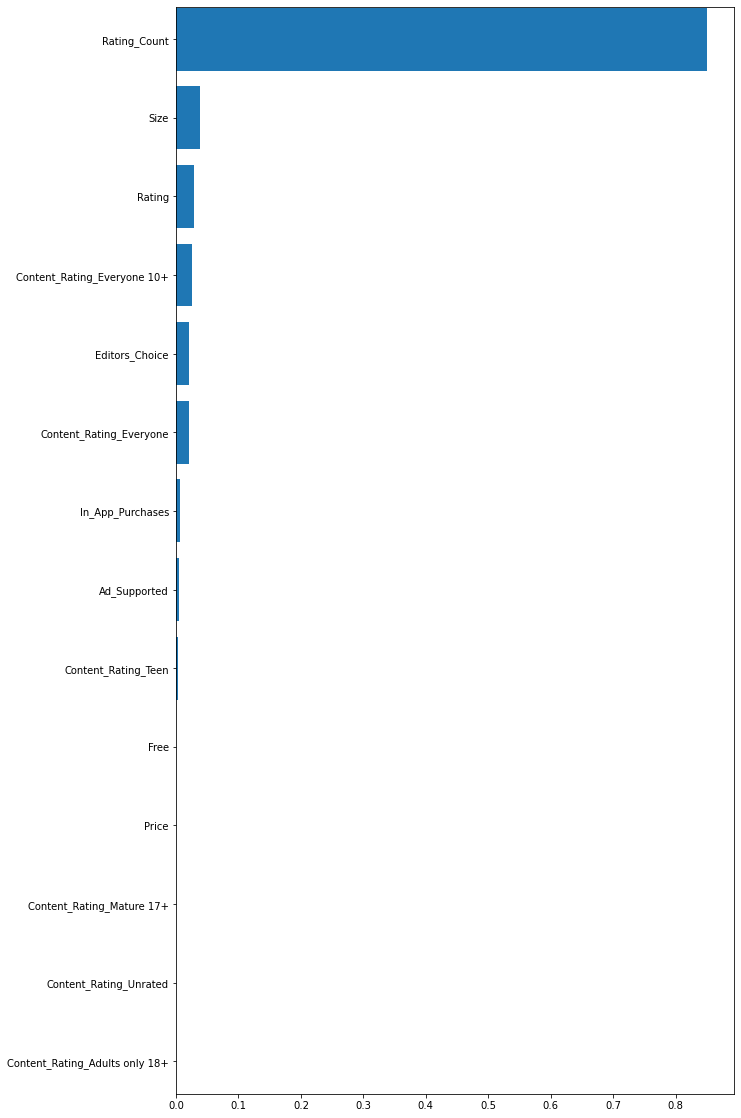

In [95]:


features = sorted(zip(X_new.columns, model.feature_importances_), key = lambda x: x[1])
cols = [f[0] for f in features]
width = [f[1] for f in features]

fig, ax = plt.subplots()

fig.set_size_inches(10,20)
plt.margins(y=0.001)

ax.barh(y=cols, width=width)

plt.show()


In [ ]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler().fit(x_train)
x_train_scaled = scaler.transform(x_train)
x_test_scaled = scaler.transform(x_test)

In [ ]:
from sklearn.feature_selection import SelectFromModel
sel = SelectFromModel(model)
sel.fit(x_train, y_train)

SelectFromModel(estimator=RandomForestRegressor(random_state=0))

In [ ]:
from sklearn.preprocessing import StandardScaler
X_selected_train, X_selected_test, y_train, y_test = train_test_split(sel.transform(X_new), y_new, random_state=0)
scaler = StandardScaler().fit(X_selected_train)
X_selected_train_scaled = scaler.transform(X_selected_train)
X_selected_test_scaled = scaler.transform(X_selected_test)

In [ ]:
from sklearn.linear_model import LogisticRegression
rgf = LogisticRegression().fit(x_train, y_train)
print(f'Training Score: {rgf.score(X_selected_train_scaled, y_train)}')
print(f'Testing Score: {rgf.score(X_selected_test_scaled, y_test)}')

ValueError: Found input variables with inconsistent numbers of samples: [7999, 7499]